# Analyze after each EXP

## 1. rating distribution, basic info, axis distribution, etc

mean: 0.0405
max: 0.1785
min: 0.0012
std: 0.0327
count: 300


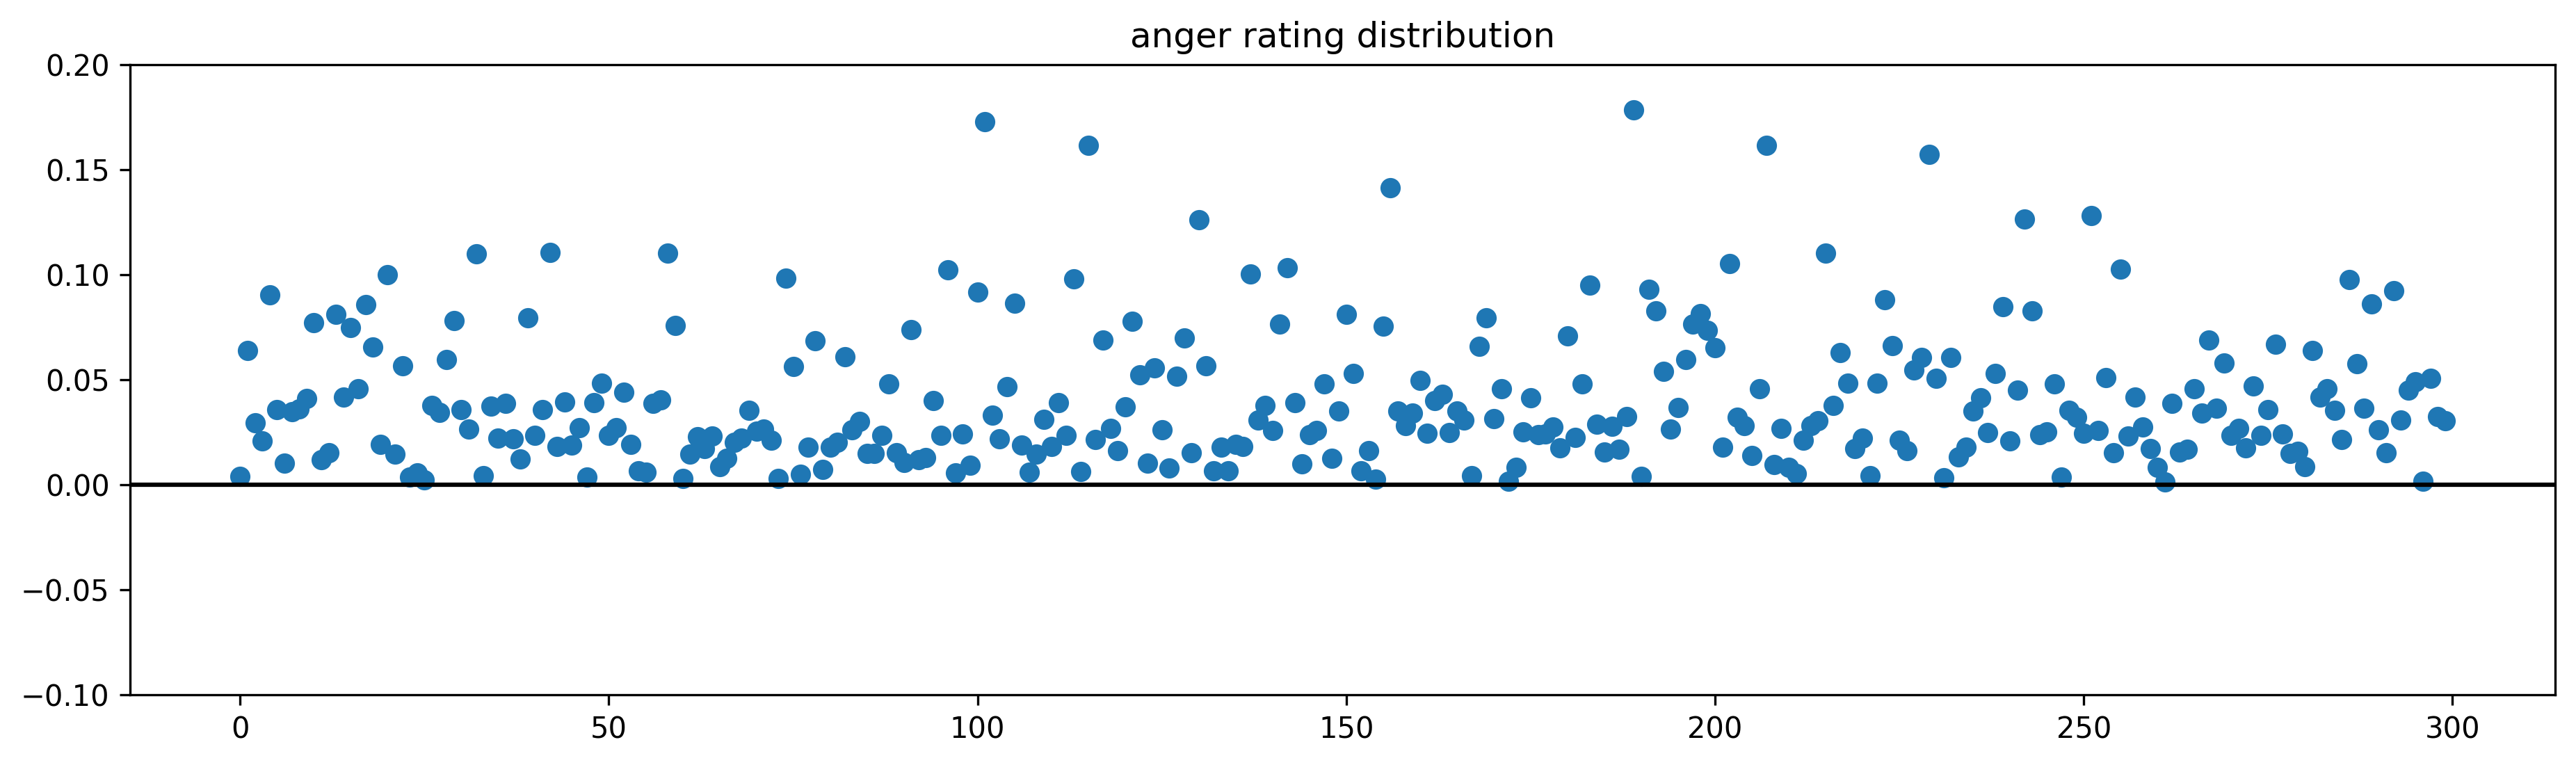

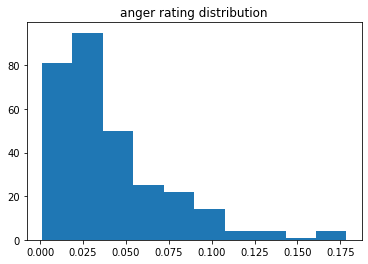

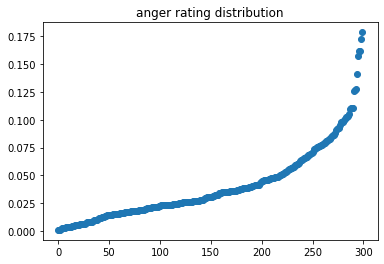

In [31]:
# rating distribution, basic info
import os
import pandas as pd
def get_rating_dist(fold_name, target_emo):
    images = [x for x in os.listdir(os.path.join(fold_name, target_emo)) if 'png' in x]
    res = []
    for img in images:
        test = os.path.join(fold_name, target_emo, img)
        csvname = test.split('.png')[0] + '_emotion.csv'
        tmp = pd.read_csv(csvname)
        res.append(float(tmp[target_emo]))

    print('mean:', round(sum(res)/len(res), 4))
    print('max:', round(max(res), 4))
    print('min:', round(min(res), 4))
    print('std:', round(pd.Series(res).std(), 4))
    print('count:', len(res))

    # scatter plot the distribution
    import matplotlib.pyplot as plt
    # set fig y axis range 0 1
    plt.figure(figsize=(15, 4), dpi=300)
    plt.ylim(-0.1, 0.2)
    plt.scatter(range(len(res)), res)
    # draw a horizontal line at y=0
    plt.axhline(y=0, color='k')
    plt.title(target_emo + ' rating distribution')
    plt.show()

    # draw the histogram
    plt.hist(res, bins=10)
    plt.title(target_emo + ' rating distribution')
    plt.show()

    # draw the scatter plot in sorted order
    res.sort()
    plt.scatter(range(len(res)), res)
    plt.title(target_emo + ' rating distribution')
    plt.show()
    
    return res
    

fold_name = 'image_analysis/241114Exp25/new_baseline'
target_emo = 'anger'
res = get_rating_dist(fold_name, target_emo)

In [35]:
import math

def top_30_percent_cutoff(values):
    sorted_values = sorted(values, reverse=True)  # Step 1
    print(sorted_values)
    cutoff_index = math.ceil(len(sorted_values) * 0.3) - 1  # Step 2
    print(cutoff_index)
    return sorted_values[cutoff_index]  # Step 3

# Example usage
cutoff_point = top_30_percent_cutoff(res)
print("Top 30% cutoff point:", cutoff_point)

[0.17852989, 0.1729027, 0.16163121, 0.16163115, 0.15726602, 0.14145601, 0.12801576, 0.12647639, 0.1261592, 0.11055357, 0.11026564, 0.110164404, 0.109994136, 0.10526319, 0.1033921, 0.10251655, 0.10210107, 0.10024891, 0.099833645, 0.09834606, 0.09803954, 0.09775802, 0.09486826, 0.09293833, 0.092209645, 0.09172971, 0.090423174, 0.088004515, 0.086471766, 0.086071916, 0.085643865, 0.08480554, 0.08273093, 0.082639955, 0.08147829, 0.081112176, 0.08107248, 0.079511456, 0.07932481, 0.078169174, 0.077742875, 0.07706474, 0.076589465, 0.07633819, 0.075886026, 0.07550092, 0.07477217, 0.07371879, 0.07360755, 0.07092235, 0.06991549, 0.068929784, 0.06882245, 0.0685072, 0.0668051, 0.06619615, 0.06581718, 0.06559498, 0.06504504, 0.06390524, 0.06379226, 0.06291671, 0.060994703, 0.060605988, 0.060590416, 0.05969713, 0.05961148, 0.057999786, 0.057477873, 0.05653707, 0.056434926, 0.056086257, 0.055698995, 0.05470199, 0.05396718, 0.0529568, 0.052811578, 0.052231282, 0.051751986, 0.050988015, 0.050686955, 0.0

['2024_11_17_18_06_00_anger_1.png', '2024_11_17_18_06_03_anger_2.png', '2024_11_17_18_06_06_anger_3.png', '2024_11_17_18_06_09_anger_4.png', '2024_11_17_18_06_12_anger_5.png', '2024_11_17_18_06_15_anger_6.png', '2024_11_17_18_06_18_anger_7.png', '2024_11_17_18_06_20_anger_8.png', '2024_11_17_18_06_23_anger_9.png', '2024_11_17_18_06_26_anger_10.png']
mean: 0.0341
max: 0.5657
min: 0.0026
std: 0.0838
count: 198


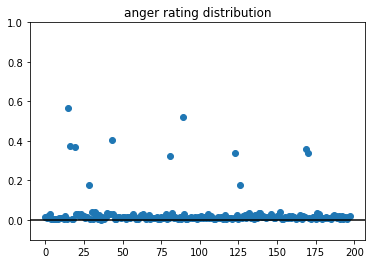

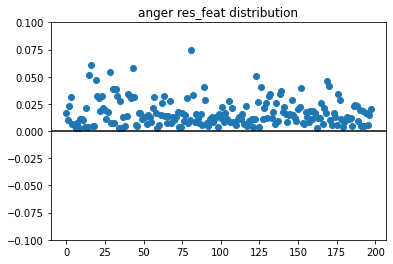

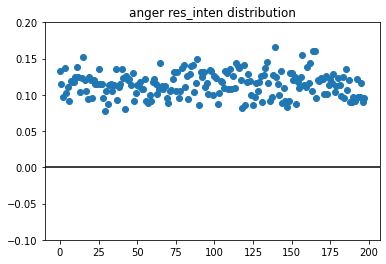

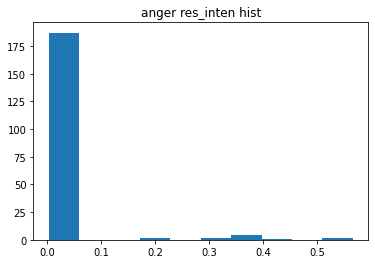

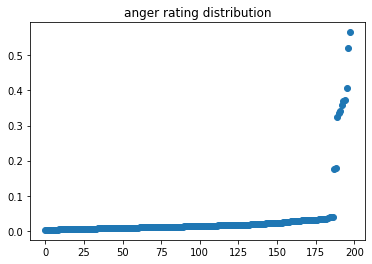

In [57]:
# rating distribution, basic info
import os
import pandas as pd
def get_rating_dist(fold_name, target_emo):
    images = [x for x in os.listdir(fold_name) if 'png' in x]
    images = sorted(images, key=lambda x: int(x.split('.png')[0].split('_')[-1]))
    print(images[:10])
    res = []
    res_feat = []
    res_inten = []
    for img in images:
        test = os.path.join(fold_name, img)
        csvname = test.split('.png')[0] + '_output_and_axes.csv'
        tmp = pd.read_csv(csvname)
        res.append(float(tmp['rating']))
        res_feat.append(float(tmp['feat']))
        res_inten.append(float(tmp['inten']))

    print('mean:', round(sum(res)/len(res), 4))
    print('max:', round(max(res), 4))
    print('min:', round(min(res), 4))
    print('std:', round(pd.Series(res).std(), 4))
    print('count:', len(res))

    # scatter plot the distribution
    import matplotlib.pyplot as plt
    # set fig y axis range 0 1
    plt.ylim(-0.1, 1)
    plt.scatter(range(len(res)), res)
    # draw a horizontal line at y=0
    plt.axhline(y=0, color='k')
    plt.title(target_emo + ' rating distribution')
    plt.show()
    
    plt.ylim(-0.1, 0.1)
    plt.scatter(range(len(res_feat)), res_feat)
    # draw a horizontal line at y=0
    plt.axhline(y=0, color='k')
    plt.title(target_emo + ' res_feat distribution')
    plt.show()
    
    plt.ylim(-0.1, 0.2)
    plt.scatter(range(len(res_inten)), res_inten)
    # draw a horizontal line at y=0
    plt.axhline(y=0, color='k')
    plt.title(target_emo + ' res_inten distribution')
    plt.show()

    # draw the histogram
    plt.hist(res, bins=10)
    plt.title(target_emo + ' res_inten hist')
    plt.show()

    # draw the scatter plot in sorted order
    res.sort()
    plt.scatter(range(len(res)), res)
    plt.title(target_emo + ' rating distribution')
    plt.show()
    
    return res, res_feat, res_inten

fold_name = 'image_analysis/anger'
target_emo = 'anger'
res, res_feat, res_inten = get_rating_dist(fold_name, target_emo)


In [58]:
print(res_feat)
print(res_inten)

[0.017071456, 0.010300894, 0.022800554, 0.031383716, 0.00691148, 0.005706456, 0.0030154858, 0.007747894, 0.0029255464, 0.0107252365, 0.01078361, 0.010186545, 0.0040911296, 0.021526527, 0.0040620235, 0.051476568, 0.060791, 0.0047750124, 0.005022826, 0.046992645, 0.03183607, 0.030627165, 0.018195797, 0.03264748, 0.02088789, 0.01898008, 0.011349512, 0.017610716, 0.05393086, 0.007480189, 0.038677346, 0.007412545, 0.0389539, 0.03185047, 0.002836081, 0.027959345, 0.0026285518, 0.013298565, 0.0045365626, 0.013583234, 0.03383318, 0.032103475, 0.030653102, 0.05805094, 0.031575263, 0.00555306, 0.00480297, 0.01626218, 0.016844328, 0.0114995325, 0.013302886, 0.013352789, 0.006960427, 0.014412346, 0.0129304, 0.008791163, 0.021271123, 0.031659726, 0.016614372, 0.0029884127, 0.005311897, 0.014443191, 0.026251981, 0.032017674, 0.014190679, 0.0071774325, 0.01422253, 0.027823921, 0.007170656, 0.012740134, 0.010254063, 0.012567715, 0.017401727, 0.003864276, 0.0038454034, 0.016308527, 0.0094484445, 0.0145

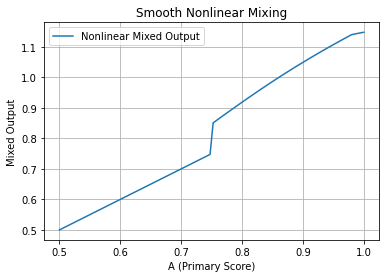

In [60]:
import matplotlib.pyplot as plt

# Test data
A_values = np.linspace(0.5, 1.0, 100)  # Simulating A in range
B_values = np.linspace(0.4, 0.65, 100)  # Simulating B in range


def calculate_output_nonlinear(A, B, threshold=0.75, alpha=0.8, B_min=0.39, B_max=0.64, output_min=0.75, output_max=1.2, k=10):
    # Clamp B within its defined range
    B = max(B_min, min(B, B_max))
    
    # Scale B to the desired output range [output_min, output_max]
    B_mapped = output_min + (B - B_min) * (output_max - output_min) / (B_max - B_min)
    
    # Apply sigmoid-based weight for smooth transition
    weight = 1 / (1 + np.exp(-k * (A - threshold)))
    
    # Ensure continuity: blend A and scaled B_mapped smoothly
    if A <= threshold:
        # Below threshold, use A directly
        output = A
    else:
        # Above threshold, calculate the smooth nonlinear mixed output
        output = weight * (alpha * B_mapped + (1 - alpha) * A) + (1 - weight) * A
    
    return output

# Calculate outputs
outputs = [calculate_output_nonlinear(A, B) for A, B in zip(A_values, B_values)]

# Plot
plt.plot(A_values, outputs, label="Nonlinear Mixed Output")
plt.xlabel("A (Primary Score)")
plt.ylabel("Mixed Output")
plt.title("Smooth Nonlinear Mixing")
plt.legend()
plt.grid()
plt.show()

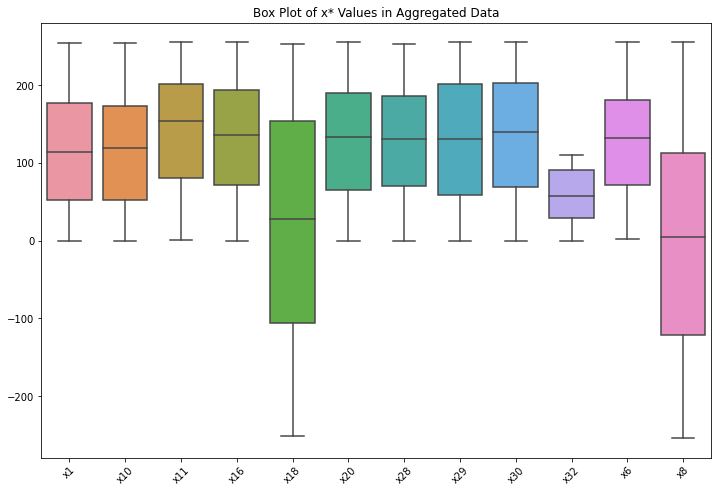

In [45]:
# axis distribution

def get_axis_dist_figure(fold_name, target_emo):
    images = [x for x in os.listdir(os.path.join(fold_name)) if 'png' in x]
    aggregated_data = pd.DataFrame()
    for img in images:
        test = os.path.join(fold_name, img)
        csvname = test.split('.png')[0] + '_output_and_axes.csv'
        tmp = pd.read_csv(csvname)
        aggregated_data = pd.concat([aggregated_data, tmp], ignore_index=True)

    # Verify the aggregation by checking the shape and first few rows
    aggregated_data.shape, aggregated_data.head()

    # draw the box plot with scatter plot
    import seaborn as sns
    import matplotlib.pyplot as plt
    plt.figure(figsize=(12, 8))
    sns.boxplot(data=aggregated_data.drop(columns=['rating', 'feat', 'inten']))
#     sns.swarmplot(data=aggregated_data.drop(columns='rating'), color='green')blue
    plt.xticks(rotation=45)
    plt.title("Box Plot of x* Values in Aggregated Data")
    plt.show()

get_axis_dist_figure(fold_name, target_emo)

## 2. different rating distributions

In [ ]:
# 

## 3. visualize figures by ratings order

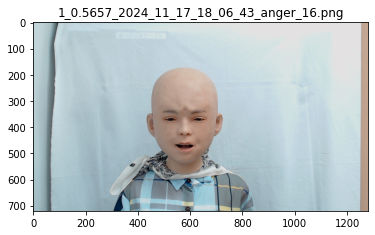

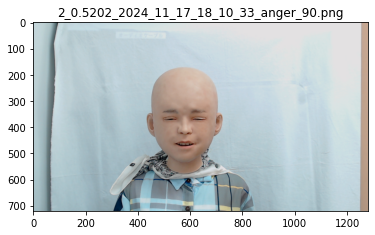

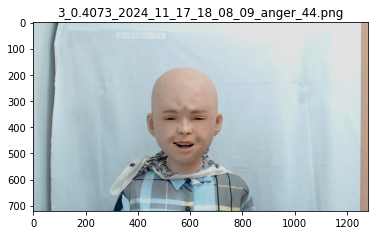

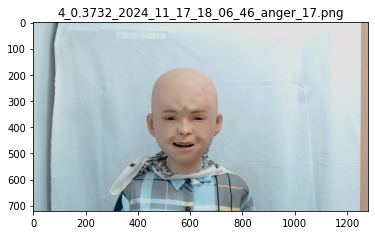

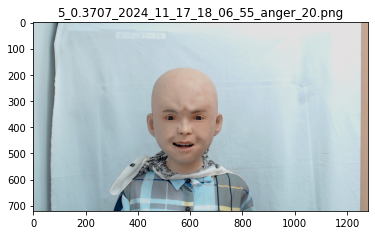

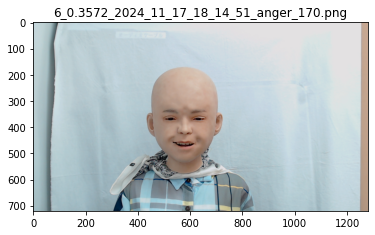

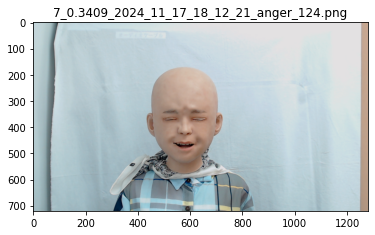

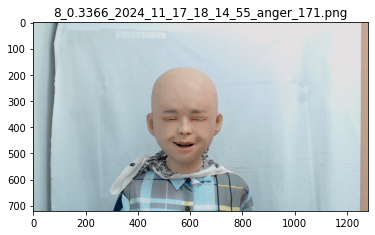

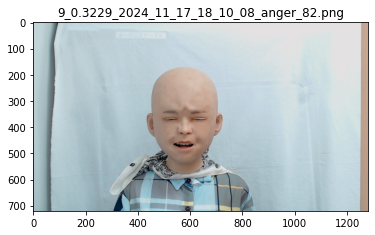

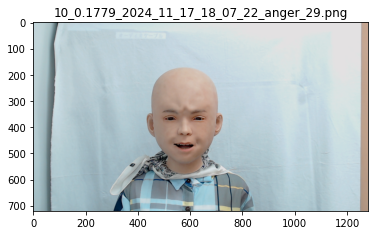

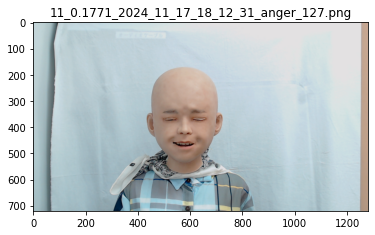

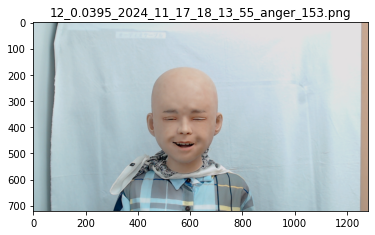

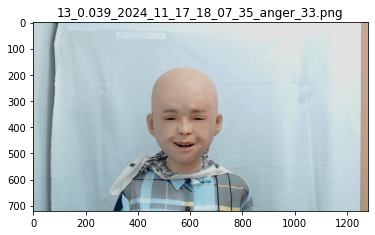

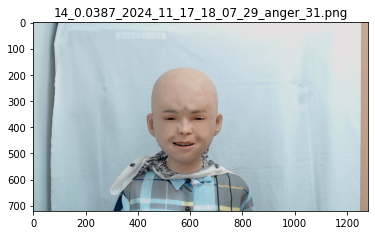

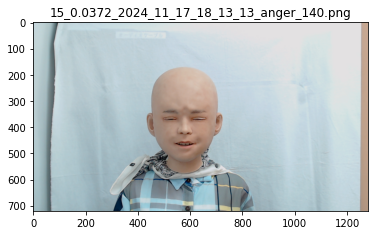

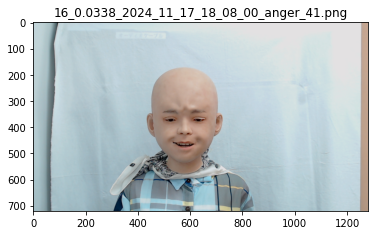

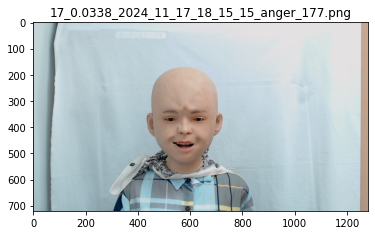

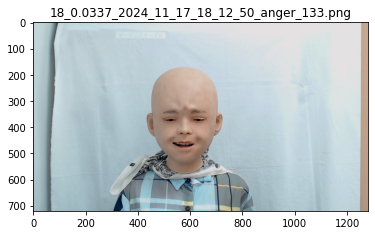

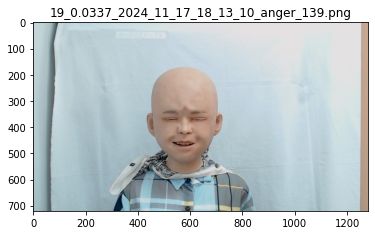

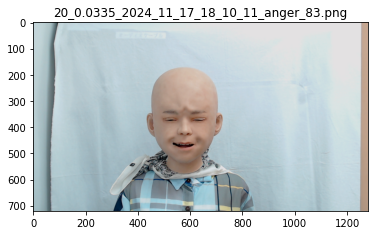

In [46]:
import shutil
def get_png_rating_pairs(fold_name, target_emo):
    images = [x for x in os.listdir(os.path.join(fold_name)) if 'png' in x]
    res = []
    for img in images:
        test = os.path.join(fold_name, img)
        csvname = test.split('.png')[0] + '_output_and_axes.csv'
        tmp = pd.read_csv(csvname)
        res.append(float(tmp['rating']))
    return list(zip(images, res))

# put the top 30 images in a subfolder with the ranking in the filename

def move_top_images(fold_name, target_emo, top_n):
    test = get_png_rating_pairs(fold_name, target_emo)
    test = sorted(test, key=lambda x: x[1], reverse=True)
    for i in range(top_n):
        # check if the sub folder exists
        if not os.path.exists(os.path.join(fold_name, 'top_images')):
            os.makedirs(os.path.join(fold_name, 'top_images'))
        # copy to the sub folder named top_images
        shutil.copy(os.path.join(fold_name, test[i][0]), os.path.join(fold_name, 'top_images', str(i + 1) + '_' + str(round(test[i][1], 4)) + '_' + test[i][0]))
    return None

def show_images_in_subfolder(fold_name, target_emo):
    import matplotlib.pyplot as plt
    images = [x for x in os.listdir(os.path.join(fold_name, 'top_images')) if 'png' in x]
    images = sorted(images, key=lambda x: int(x.split('_')[0]))
    for img in images:
        plt.imshow(plt.imread(os.path.join(fold_name, 'top_images', img)))
        plt.title(img)
        plt.show()

# usage
sorted_pairs = sorted(get_png_rating_pairs(fold_name, target_emo), key=lambda x: x[1], reverse=True)
move_top_images(fold_name, target_emo, 20)
show_images_in_subfolder(fold_name, target_emo)

## 4. Analyze the ratings for human judged probe images and the top ratings

In [ ]:

filename_order_pairs = get_png_rating_pairs(fold_name, target_emo)
filename_order_pairs.reverse()
print(filename_order_pairs)

# probe should be the first ** files



[('2024_11_13_15_40_38_disgust_0.png', 0.00026482125), ('2024_11_13_15_40_42_disgust_1.png', 0.37437734), ('2024_11_13_15_40_45_disgust_2.png', 0.039546266)]


In [31]:
filename_order_pairs

[('2024_11_13_15_40_45_disgust_2.png', 0.039546266),
 ('2024_11_13_15_40_42_disgust_1.png', 0.37437734),
 ('2024_11_13_15_40_38_disgust_0.png', 0.00026482125)]

## 5. Visualize the intensitynet order

mean: 0.4897
max: 0.6511
min: 0.3149
std: 0.0609
count: 300


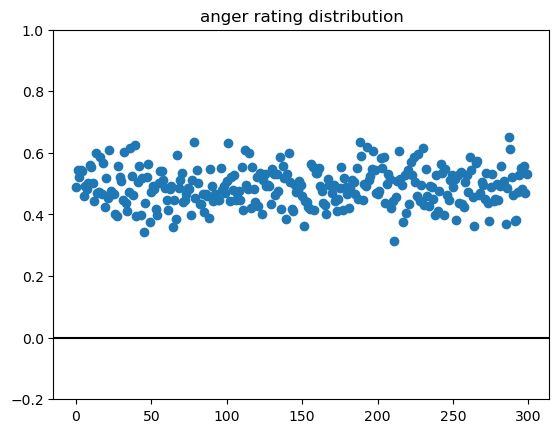

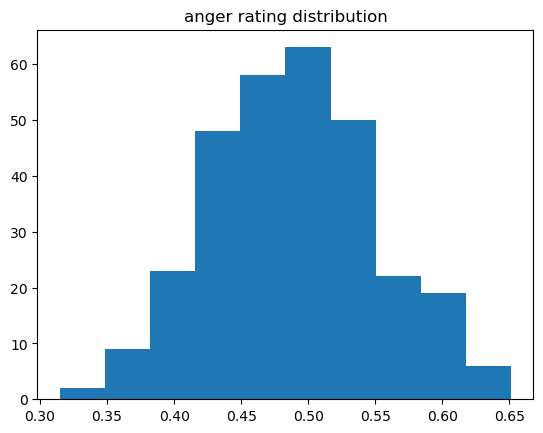

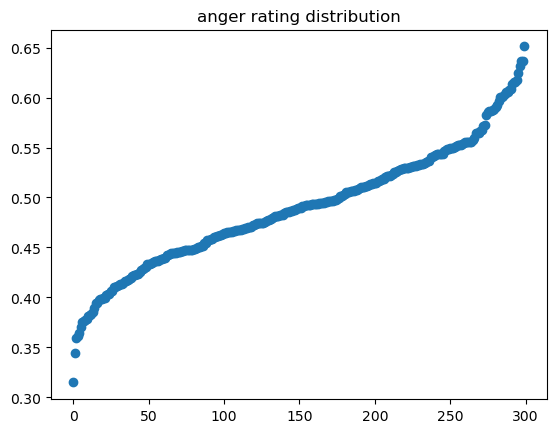

In [20]:
# rating distribution, basic info
import os
import pandas as pd
def get_rating_dist(fold_name, target_emo):
    images = [x for x in os.listdir(os.path.join(fold_name, target_emo)) if 'png' in x]
    res = []
    for img in images:
        test = os.path.join(fold_name, target_emo, img)
        csvname = test.split('.png')[0] + '_intensitynet.csv'
        tmp = pd.read_csv(csvname)
#         res.append(float(tmp[target_emo]))
        res.append(float(tmp['angry']))

    print('mean:', round(sum(res)/len(res), 4))
    print('max:', round(max(res), 4))
    print('min:', round(min(res), 4))
    print('std:', round(pd.Series(res).std(), 4))
    print('count:', len(res))

    # scatter plot the distribution
    import matplotlib.pyplot as plt
    # set fig y axis range 0 1
    plt.ylim(-0.2, 1)
    plt.scatter(range(len(res)), res)
    # draw a horizontal line at y=0
    plt.axhline(y=0, color='k')
    plt.title(target_emo + ' rating distribution')
    plt.show()

    # draw the histogram
    plt.hist(res, bins=10)
    plt.title(target_emo + ' rating distribution')
    plt.show()

    # draw the scatter plot in sorted order
    res.sort()
    plt.scatter(range(len(res)), res)
    plt.title(target_emo + ' rating distribution')
    plt.show()
    

fold_name = 'image_analysis/241114Exp25/new_baseline'
target_emo = 'anger'
get_rating_dist(fold_name, target_emo)

## 6. visualize figures by ratings order

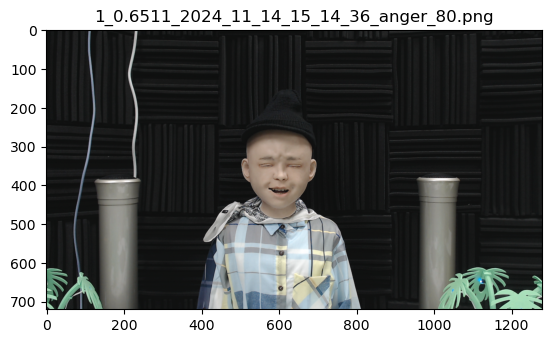

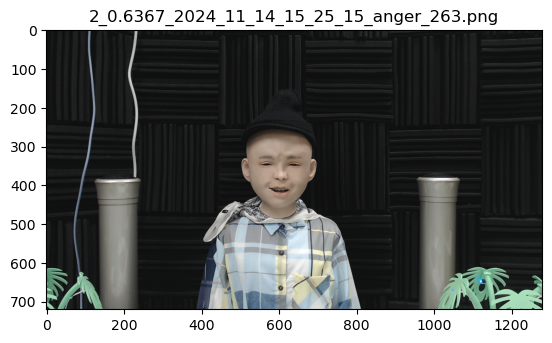

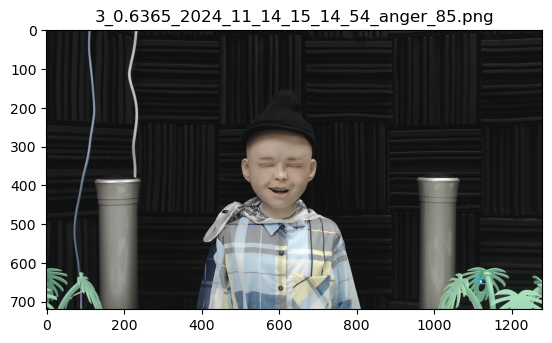

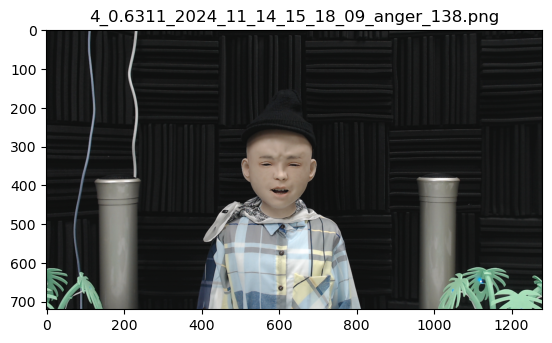

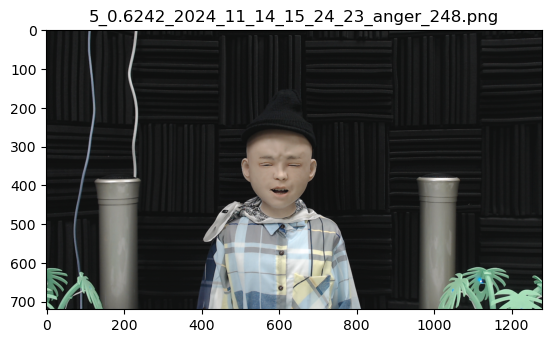

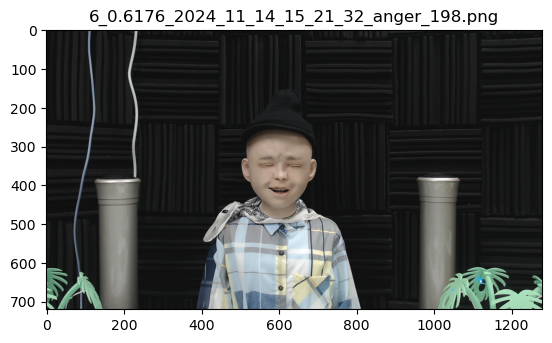

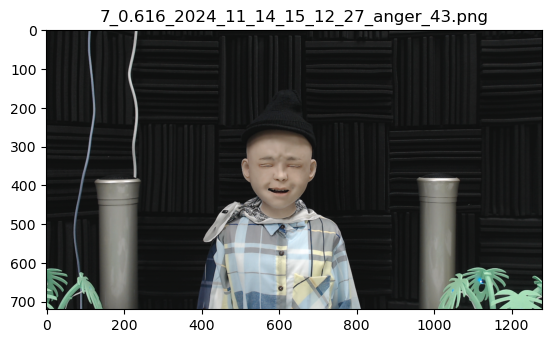

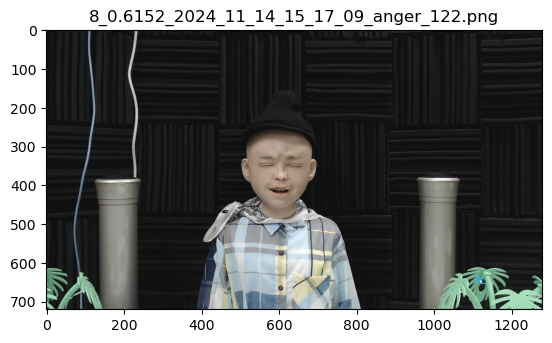

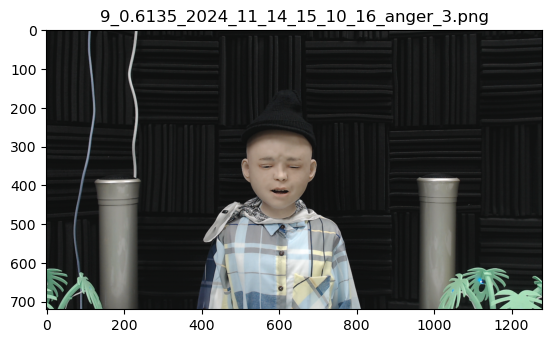

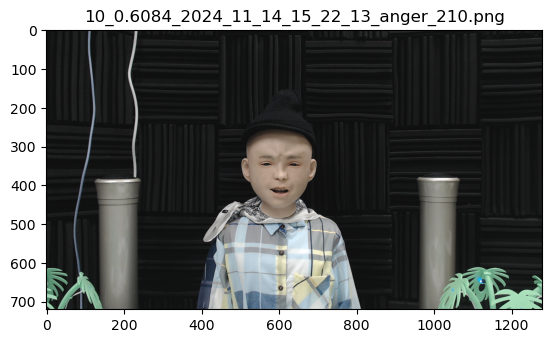

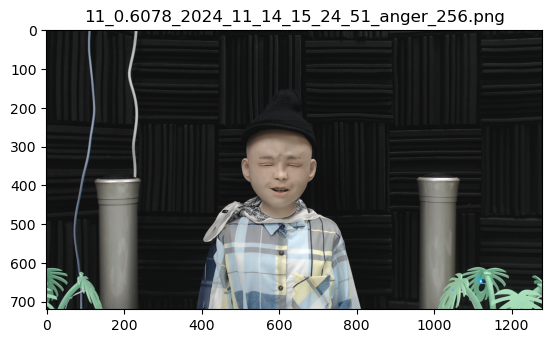

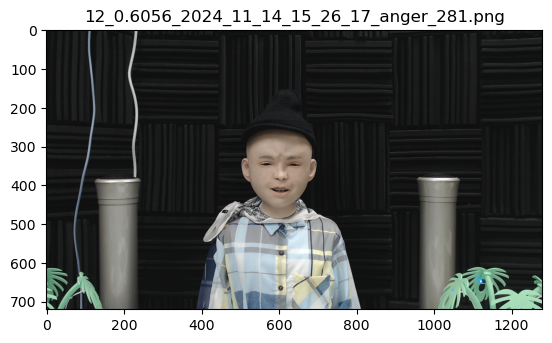

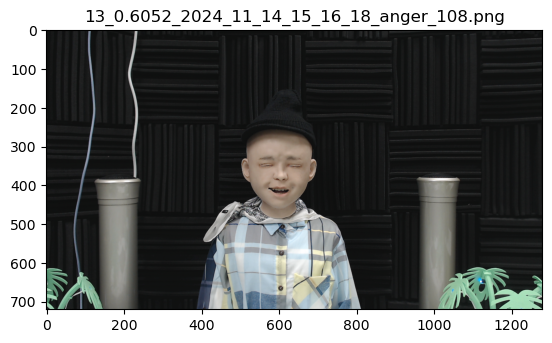

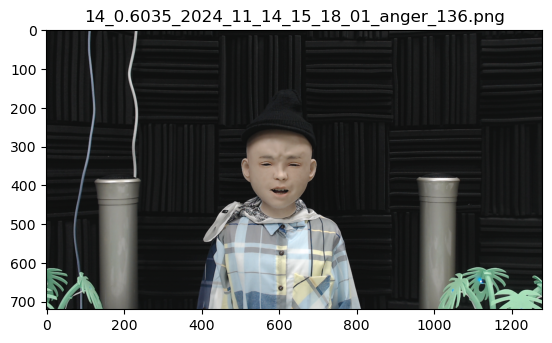

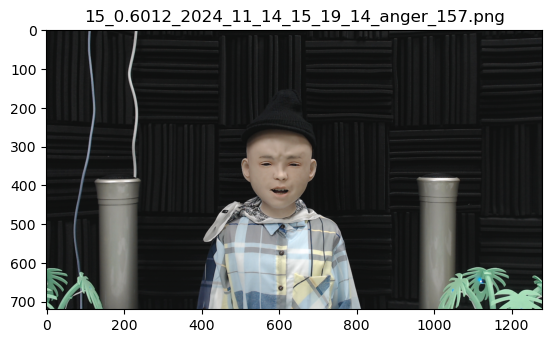

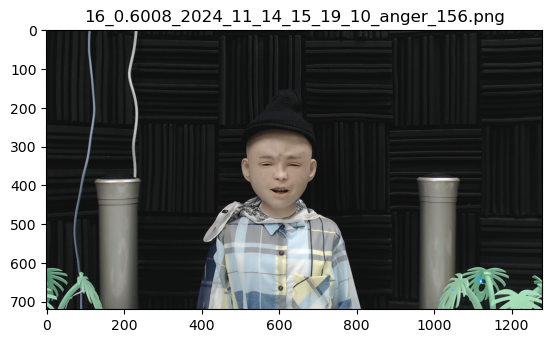

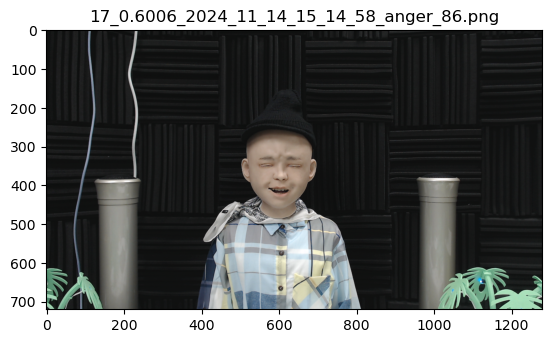

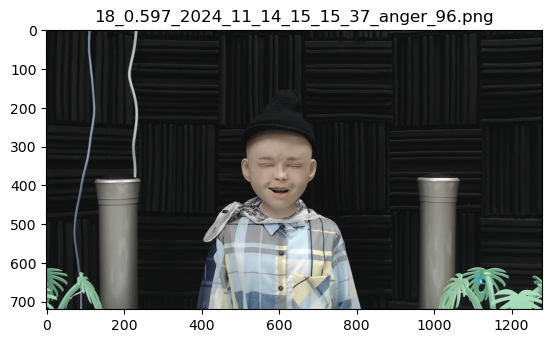

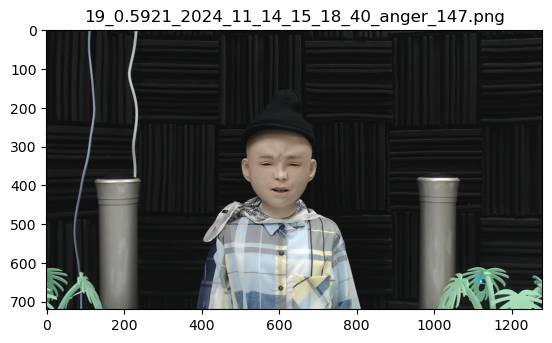

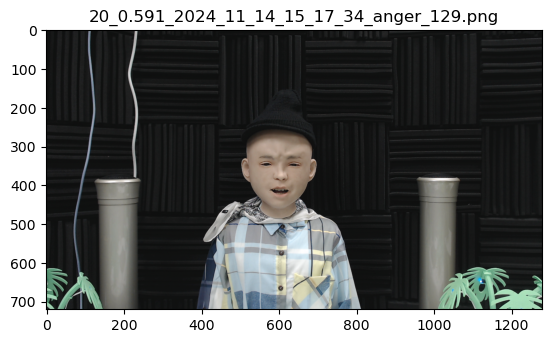

In [24]:
import shutil
def get_png_rating_pairs(fold_name, target_emo):
    images = [x for x in os.listdir(os.path.join(fold_name, target_emo)) if 'png' in x]
    res = []
    for img in images:
        test = os.path.join(fold_name, target_emo, img)
        csvname = test.split('.png')[0] + '_intensitynet.csv'
        tmp = pd.read_csv(csvname)
#         res.append(float(tmp[target_emo]))
        res.append(float(tmp['angry']))
    return list(zip(images, res))

# put the top 30 images in a subfolder with the ranking in the filename

def move_top_images(fold_name, target_emo, top_n):
    test = get_png_rating_pairs(fold_name, target_emo)
    test = sorted(test, key=lambda x: x[1], reverse=True)
    for i in range(top_n):
        # check if the sub folder exists
        if not os.path.exists(os.path.join(fold_name, target_emo, 'top_images_inten')):
            os.makedirs(os.path.join(fold_name, target_emo, 'top_images_inten'))
        # copy to the sub folder named top_images
        shutil.copy(os.path.join(fold_name, target_emo, test[i][0]), os.path.join(fold_name, target_emo, 'top_images_inten', str(i + 1) + '_' + str(round(test[i][1], 4)) + '_' + test[i][0]))
    return None

def show_images_in_subfolder(fold_name, target_emo):
    import matplotlib.pyplot as plt
    images = [x for x in os.listdir(os.path.join(fold_name, target_emo, 'top_images_inten')) if 'png' in x]
    images = sorted(images, key=lambda x: int(x.split('_')[0]))
    for img in images:
        plt.imshow(plt.imread(os.path.join(fold_name, target_emo, 'top_images_inten', img)))
        plt.title(img)
        plt.show()

# usage
sorted_pairs = sorted(get_png_rating_pairs(fold_name, target_emo), key=lambda x: x[1], reverse=True)
move_top_images(fold_name, target_emo, 20)
show_images_in_subfolder(fold_name, target_emo)

In [12]:
# load log and analyze
import pandas as pd
import json

# Load the JSON file
data = pd.read_json('image_analysis/anger/baye_logs.json', lines=True)

# Display the first few rows
print(data.head())

negative_indices = data[data['target'] < 0].index.tolist()
negative_indices


     target                                             params  \
0  0.013234  {'x1': 141.4699283283842, 'x10': 1.61147456520...   
1  0.005860  {'x1': 95.64701226922041, 'x10': 151.401416119...   
2  0.046329  {'x1': 88.7744608756346, 'x10': 62.25044060576...   
3  0.022448  {'x1': 245.16173295051672, 'x10': 95.559653090...   
4  0.016686  {'x1': 50.75987051091533, 'x10': 18.5608121146...   

                                            datetime  
0  {'datetime': '2024-11-16 20:53:12', 'elapsed':...  
1  {'datetime': '2024-11-16 20:53:15', 'elapsed':...  
2  {'datetime': '2024-11-16 20:53:18', 'elapsed':...  
3  {'datetime': '2024-11-16 20:53:21', 'elapsed':...  
4  {'datetime': '2024-11-16 20:53:24', 'elapsed':...  


[34, 46]

In [29]:
import numpy as np
def calculate_output_nonlinear(A, B, threshold=0.75, alpha=0.8, B_min=0.39, B_max=0.64, output_min=0.75, output_max=1.2, k=10):
    # If A is below or equal to the threshold, output A directly
    if A <= threshold:
        return A
    
    # Scale B to fit within the desired range [output_min, output_max]
    B_mapped = output_min + (B - B_min) * (output_max - output_min) / (B_max - B_min)
    print(B_mapped)
    
    # Apply a sigmoid-based weight for smooth transition
    weight = 1 / (1 + np.exp(-k * (A - threshold)))  # Sigmoid function for smoother blending
    
    # Calculate the smooth nonlinear mixed output
    output = weight * (alpha * B_mapped + (1 - alpha) * A) + (1 - weight) * A
    
    return output

output_feat = 0.15581991
output_inten = 0.0663062584400177
threshold = 0.1

B_max= 0.1813
B_min= 0.0966

output = calculate_output_nonlinear(output_feat, output_inten, threshold=threshold, alpha=0.8, B_min=B_min, B_max=B_max, output_min=threshold, output_max=1.1, k=10)
print(output)

-0.2576592864224595
-0.05457012881275982


In [ ]:
[470.30353, 235.7863, 690.0836, 532.0844, 0.99978167]